In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
%matplotlib inline
import os
import sys

print (sys.stdout.encoding)

UTF-8


In [2]:
from bs4 import BeautifulSoup 
import requests
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [3]:
td = date.today().isoformat()
print (td)
lls = lambda x: [x]

dateiso = '-'.join(map(lambda x: str(int(x)), date.today().isoformat().split("-")))
dateiso

2021-03-07


'2021-3-7'

In [4]:
URL = 'http://fubon-ebrokerdj.fbs.com.tw/Z/ZC/ZCX/ZCX_2330.djhtm'

resp = requests.get(URL)
soup = BeautifulSoup(resp.text, 'html.parser')
table = soup.find_all('table', {'class': 't01'})[1]
values = list(map(lambda x: str(x.text).replace(',',''), table.find_all('td', {'class': 't3n1'})))
ohlcV = {
    'O': 0,
    'H': 1,
    'L': 2,
    'C': 3,
    'V': 11
}
for k,v in ohlcV.items():
    ohlcV[k] = lls(values[ohlcV[k]])
    
ohlcV = pd.DataFrame(ohlcV)
ohlcV

,O,H,L,C,V
0,588.00,605.00,584.00,601.00,91339


In [5]:
URL= 'http://fubon-ebrokerdj.fbs.com.tw/z/zc/zcx/zcxD5.djjs?A=2330'

resp = requests.get(URL)
soup = BeautifulSoup(resp.text, 'html.parser')
table = soup.find_all('table', {'class': 't01'})[0]
values = list(map(lambda x: str(x.text).replace(',',''), table.find_all('td', {'class': 't3n1'})))

MarginPS = {
    'MarginPurchaseBuy': 0,
    'MarginPurchaseCashRepayment' : 2,
    'MarginPurchaseLimit': 4,
    'MarginPurchaseSell': 1,
    'MarginPurchaseTodayBalance': 3,
    'MarginPurchaseYesterdayBalance': 7
}
for k,v in MarginPS.items():
    MarginPS[k] = lls(values[MarginPS[k]])
    
MarginPS.update({
    'date': [td],
    'stock_id': ['2330']
})
data = pd.DataFrame(MarginPS)
data



,MarginPurchaseBuy,MarginPurchaseCashRepayment,MarginPurchaseLimit,MarginPurchaseSell,MarginPurchaseTodayBalance,MarginPurchaseYesterdayBalance,date,stock_id
0,2563,39,6482595,1488,37639,86,2021-03-07,2330


In [6]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockInstitutionalInvestorsBuySell",
    "data_id": "2330",
    "start_date": "2021-03-05",
    "token": "", # 參考登入，獲取金鑰
}
data = requests.get(url, params=parameter)
data = data.json()
data = pd.DataFrame(data['data'])
#data
data.head()

,date,stock_id,buy,name,sell
0,2021-03-05,2330,24533019,Foreign_Investor,46846114
1,2021-03-05,2330,0,Foreign_Dealer_Self,0
2,2021-03-05,2330,1196000,Investment_Trust,5000
3,2021-03-05,2330,1341000,Dealer_self,1533898
4,2021-03-05,2330,526000,Dealer_Hedging,579374


In [7]:
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockSecuritiesLending",
    "data_id": "8044",
    "start_date": "2021-02-01",
    "token": "", # 參考登入，獲取金鑰
}
data = requests.get(url, params=parameter)
data = data.json()
data = pd.DataFrame(data['data'])
print(data.head())

         date stock_id transaction_type  volume  fee_rate  close  \
0  2021-02-26     8044               議借      50       3.5   82.3   
1  2021-03-02     8044               議借     110       3.5   81.7   
2  2021-03-04     8044               議借     320       3.5   79.3   

  original_return_date  original_lending_period  
0           2021-08-26                      181  
1           2021-09-02                      184  
2           2021-09-03                      183  


In [8]:
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))
import abupy

NumExpr defaulting to 8 threads.


In [9]:
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.disable_example_env_ipython()

disable example env


In [10]:
abupy.env.g_is_ipython = 0

In [11]:
abupy.env.g_data_fetch_mode

<EMarketDataFetchMode.E_DATA_FETCH_NORMAL: 0>

In [12]:
abupy.env.g_data_fetch_mode = abupy.EMarketDataFetchMode.E_DATA_FETCH_FORCE_NET

In [13]:
abupy.ABuSymbolPd.make_kl_df('2330', n_folds=4).tail()

tw_TWSE:2330


,open,close,high,low,volume,date,pre_close,date_week,p_change,atr21,atr14,key
2021-02-26,611.0,606.0,618.0,606.0,111483000,20210226,635.0,4,-4.567,22.7307,22.0454,973
2021-03-02,621.0,609.0,622.0,609.0,55444973,20210302,606.0,1,0.495,23.0279,22.5727,974
2021-03-03,609.0,622.0,622.0,601.0,47944000,20210303,609.0,2,2.135,22.8435,22.3630,975
2021-03-04,609.0,601.0,611.0,601.0,67387000,20210304,622.0,3,-3.376,21.6759,20.7146,976
2021-03-05,588.0,601.0,605.0,584.0,79687000,20210305,601.0,4,0.000,23.1599,23.0193,977


In [14]:
from abupy import AbuDoubleMaBuy, AbuDoubleMaSell, AbuSDBreak, AbuFactorBuyBreak
from abupy import AbuFactorCloseAtrNStop, AbuFactorAtrNStop, AbuFactorPreAtrNStop
from abupy import abu, ABuProgress, AbuMetricsBase, EMarketTargetType, ABuMarketDrawing
from abupy import AbuFactorSellNDay, AbuFactorBuyWD, AbuFactorSellBreak
from abupy import AbuSymbolTW

In [15]:
buy_factors = [{'class': AbuDoubleMaBuy},
               {'xd': 21, 'class': AbuFactorBuyBreak}, 
               {'xd': 7, 'class': AbuSDBreak}]

sell_factors = [
    {'class': AbuDoubleMaSell},
    {'xd': 21, 'class': AbuFactorSellBreak},
    {'stop_loss_n': 1.0, 'stop_win_n': 3.0, 'class': AbuFactorAtrNStop},
    {'class': AbuFactorPreAtrNStop, 'pre_atr_n': 1.5},
    {'class': AbuFactorCloseAtrNStop, 'close_atr_n': 1.5}
]

In [16]:
# 使用沙盒内的美股做为回测目标
choice_symbols = ['2330']

# 初始资金量
read_cash = 3000000
# 使用run_loop_back运行策略
abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   n_folds=6,
                                                   choice_symbols=choice_symbols)
ABuProgress.clear_output()

买入后卖出的交易数量:130
买入后尚未卖出的交易数量:0
胜率:53.0769%
平均获利期望:6.9064%
平均亏损期望:-2.9244%
盈亏比:2.5836
策略收益: 45.2318%
基准收益: 311.8728%
策略年化收益: 11.2540%
基准年化收益: 77.5962%
策略买入成交比例:97.6923%
策略资金利用率比例:21.8851%
策略共执行1467个交易日


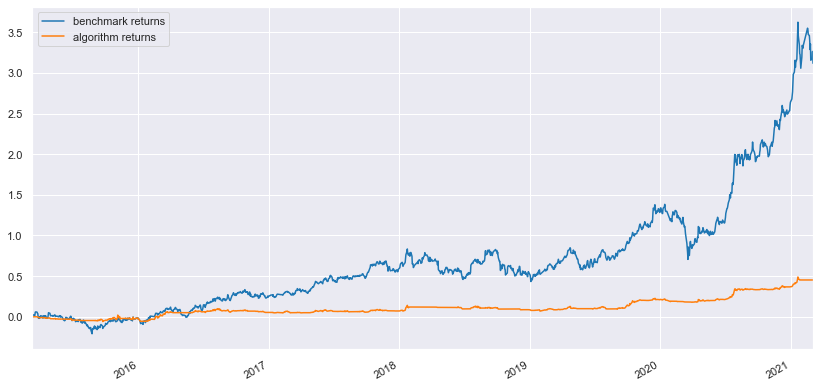

In [17]:
AbuMetricsBase.show_general(*abu_result_tuple, only_show_returns=True)

In [18]:
orders_pd = abu_result_tuple.orders_pd
view_orders = orders_pd[(orders_pd['symbol'] == '2330')]
view_orders

,buy_date,buy_price,buy_cnt,buy_factor,symbol,buy_pos,buy_type_str,expect_direction,sell_type_extra,sell_date,sell_price,sell_type,ml_features,key,profit,result,profit_cg,profit_cg_hunder,keep_days
2015-03-18,20150318,152.00,3000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_loss=1.0,20150330,143.00,loss,None,7,-27000.0,-1,-0.0592,-5.9211,12
2015-04-13,20150413,146.75,4000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorSellBreak:21,20150420,142.75,loss,None,23,-16000.0,-1,-0.0273,-2.7257,7
2015-04-24,20150424,150.50,3000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_loss=1.0,20150522,146.00,loss,None,32,-13500.0,-1,-0.0299,-2.9900,28
2015-04-27,20150427,151.50,3000.0,AbuFactorBuyBreak:21,2330,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_loss=1.0,20150522,146.00,loss,None,33,-16500.0,-1,-0.0363,-3.6304,25
2015-05-12,20150512,147.75,4000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorSellBreak:21,20150525,146.50,loss,None,43,-5000.0,-1,-0.0085,-0.8460,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,20201116,476.75,1000.0,AbuFactorBuyBreak:21,2330,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20201216,511.00,win,None,1396,34250.0,1,0.0718,7.1841,30
2020-11-17,20201117,495.75,1000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20201216,511.00,win,None,1397,15250.0,1,0.0308,3.0761,29
2020-12-31,20201231,527.00,1000.0,AbuFactorBuyBreak:21,2330,AbuAtrPosition,call,1.0,AbuFactorAtrNStop:stop_win=3.0,20210122,657.00,win,None,1429,130000.0,1,0.2467,24.6679,22
2021-01-04,20210104,534.00,1000.0,AbuSDBreak:7,2330,AbuAtrPosition,call,1.0,AbuFactorCloseAtrNStop:close_atr_n=1.5,20210126,625.00,win,None,1430,91000.0,1,0.1704,17.0412,22


In [19]:
trade_df = ABuMarketDrawing.plot_candle_from_order(view_orders)

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d

tw_TWSE:2330


No module named 'matplotlib.date'
Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 252, in _do_plot_candle
    import matplotlib.date as mdf
ModuleNotFoundError: No module named 'matplotlib.date'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 92, in plot_from_series
    view_index=view_index_inner, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 133, in plot_candle_from_symbol
    plot_candle_form_klpd(kl_pd, day_sum, html_bk, view_index, save=save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 166, in plot_candle_form_klpd
    fn, day_sum, html_bk, save)
  File "D:\sean.chen\trader\abu\abupy\MarketBu\ABuMarketDrawing.py", line 188, in plot_candle_stick
    _do_plot_candle(date, p_open, high, low, close, volume, view_index, symbol, d